# Graph EDA

#### helper functions:
graph_users(user_lst, bitcoin_df)

In [1]:
import pandas as pd
import numpy as np
import datetime
import networkx as nx
import nxpd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import sys
sys.path.insert(0, '../src')
import helpers as h
import visualizations as v

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [8]:
# Load and preprocess data
otc_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinotc.csv.gz')
alpha_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinalpha.csv.gz')
alpha_users = h.user_activity_dataframe(alpha_df)
otc_users = h.user_activity_dataframe(otc_df)

In [7]:
# Load graph objects
_ , alpha_G = h.build_graph(alpha_df)
_ , alpha_pos_G = h.build_graph(alpha_df, rating_type='pos')

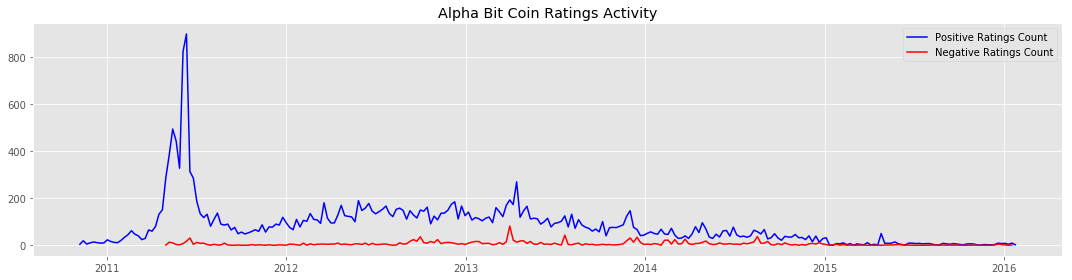

In [9]:
v.plot_timeline(alpha_df, 'Alpha Bit Coin Ratings Activity')

In [10]:
# Graph Statistics:
print(f"Node Count: {alpha_G.number_of_nodes()}")
print(f"Edge Count: {alpha_G.number_of_edges()}")

Node Count: 3783
Edge Count: 24186


In [11]:
# Graph Statistics:
print(f"Node Count: {alpha_pos_G.number_of_nodes()}")
print(f"Edge Count: {alpha_pos_G.number_of_edges()}")

# 100 nodes that are just negative? Verify??

Node Count: 3683
Edge Count: 22650


In [ ]:
alpha_df.hist('rating', bins=20)

In [ ]:
test_g = nx.ego_graph(alpha_G, 7604, radius=1)
nx.draw_shell(test_g )

In [ ]:
nxpd.draw(test_g, show='ipynb')

In [ ]:
census = nx.triadic_census(alpha_G)
census

In [ ]:
nx.clustering(test_g, 7604)

In [ ]:
node_census = nx.triads_by_type(test_g)

In [ ]:
nx.all_triads(test_g)

In [ ]:
users = [7599]
users_df, users_g = v.graph_users(users, alpha_df)
print(users_df[['date','rater','ratee','rating']])
nxpd.draw(users_g, show='ipynb')


In [ ]:
# need to take a fraudster and measure this at different radius amounts

# might also be interesting to find fully connected triads within 1 node radius of user

print("Proportion of the nodes that you rate, that also rate each other")
# low rating means more of a broadcaster, high rating means dense network with lots of mutual trust ???
g_user = nx.ego_graph(alpha_pos_G,7599, undirected=True, radius=1)
print(f"Clustering Coefficent: {nx.average_clustering(g_user):.2f}")
print(f"Clustering Coefficent: {nx.clustering(g_user, 7599):.2f}")
print(nx.transitivity(g_user))

# g_user = nx.ego_graph(alpha_pos_G,7599, undirected=True, radius=1)
# print(f"Clustering Coefficent: {nx.average_clustering(g_user):.2f}")

g_user = nx.ego_graph(alpha_pos_G,7600, undirected=True, radius=1)
print(f"Clustering Coefficent: {nx.average_clustering(g_user):.2f}")
print(nx.transitivity(g_user))

g_user = nx.ego_graph(alpha_pos_G,179, undirected=True, radius=1)
print(f"Clustering Coefficent: {nx.average_clustering(g_user):.2f}")
print(nx.transitivity(g_user))

In [ ]:
coefficients = nx.clustering(alpha_pos_G)
average = sum(coefficients.values())/len(coefficients)
print(average)

In [ ]:
print(nx.average_clustering(alpha_G))
print(nx.transitivity(alpha_G))

In [ ]:
print(nx.average_clustering(alpha_pos_G))
print(nx.transitivity(alpha_pos_G))

In [ ]:
print(f"Clustering Coefficent: {nx.clustering(alpha_pos_G, 7600):.2f}")

In [ ]:
h.user_activity(43, alpha_df[alpha_df['date']>='2012-09-17'])

In [ ]:
alpha_users.info()

In [ ]:
alpha_users.hist('FraudCnt')

In [ ]:
alpha_users.sort_values('FraudCnt', ascending=False)[:15]

### Identify Super Users - centrality metrics

In [ ]:
# Degree Centrality
#     Node Degree --> number of connections a node has

# compute degree (number of edges adjacent to the node)
print(max([val for (node, val) in G.degree()]))
print(min([val for (node, val) in G.degree()]))
# h = plt.hist([val for (node, val) in G.degree()], bins=100);
plt.hist([val for (node, val) in G.degree()], bins=1000);
# plt.loglog(h[1][1:],h[0]);

In [ ]:
# isolated nodes removed
def trim_degrees(g, degree=1):
    d=nx.degree(g)
    g2=g.copy()
    for n in g.nodes():
        if d[n]<=degree: g2.remove_node(n)
    return g2
core=trim_degrees(G)
len(core)

In [ ]:
# # Closeness Centrality
# def sorted_map(map):
#     ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
#     return ms

# ds=sorted_map(d)

In [ ]:
# nx.closeness_centrality(G)

word2ved - extracts information about entities using context alone
    input - sentences
    output - embedding for each word (describes the context of each word via the words surrounding it - read up on this)
            words appear in linear order
            find thousands of instances in which a word appears and look at the other words that appear with it. - - Then use these words to represent the meaning of the word you are focused on (distributional similarity)."you shall know a word by the company that it keeps"
- Come with a dense vector for each word such that it will be good for predicting other words that appear in the context of this word. Other words will have their own vectors and we will look for similarity measures (like dot product?) between these vectors. Then change them so that they become good predictors (recursive algorithm).  
    
node2vec - describes the context each node via it's neighbor nodes. No order to nodes on a graph.
            Applies a reduction of the graphical structure into a linear structure where word2vec can be used.

Does this by performing random walks in the graph. Each walk starts at a random node and goes in a series of steps to random neighbors. 
Learns node embeddings (the things that make nodes similar) - can use them as features for downstream task (fraud detection?)
defines probabilities (of word appearing in a text given the center word)25:30 in lecture ** good stuff

or cluster similar embeddings together (using K-means)
learns high dimensional embeddings, not just communities

node2vec? = Make vectors that are good at predicting nodes around them and vice versa.

In [ ]:
import networkx as nx

# plain graph
G = nx.complete_graph(5)  # start with K5 in networkx
A = nx.nx_agraph.to_agraph(G)  # convert to a graphviz graph
A.layout()  # neato layout
A.draw("k5.ps") 